In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
mt=pd.read_csv('monthly_by_tract.csv')
ct=pd.read_csv('census_tracts.csv')

In [78]:
mt.head()

complaint_type created_date  1000100.0  1000201.0  1000202.0  \
0    Dirty Conditions   2004-01-31        NaN        NaN        NaN   
1  Water Conservation   2004-01-31        NaN        NaN        NaN   
2                Snow   2004-01-31        NaN        NaN        NaN   
3       Water Quality   2004-01-31        NaN        NaN        NaN   
4          Electrical   2004-01-31        NaN        NaN        NaN   

   1000500.0  1000600.0  1000700.0  1000800.0  1000900.0    ...      \
0        NaN        NaN        NaN        NaN        NaN    ...       
1        NaN        NaN        NaN        NaN        NaN    ...       
2        NaN        NaN        NaN        NaN        NaN    ...       
3        NaN        NaN        NaN        NaN        NaN    ...       
4        NaN        NaN        NaN        NaN        NaN    ...       

   5027706.0  5027900.0  5029102.0  5029103.0  5029104.0  5030301.0  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   5030302.0  5031901.0  5031902.0  5032300.0  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  

[5 rows x 2165 columns]

In [79]:
ct.head()

boro_code  boro_ct201      boro_name cdeligibil  ct2010  ctlabel  \
0          5     5000900  Staten Island          I     900      9.0   
1          1     1009800      Manhattan          I    9800     98.0   
2          1     1010000      Manhattan          I   10000    100.0   
3          1     1010200      Manhattan          I   10200    102.0   
4          1     1010400      Manhattan          I   10400    104.0   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794  
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811  
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737  
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439  
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367

In [5]:
mt.columns

Index(['complaint_type', 'created_date', '1000100.0', '1000201.0', '1000202.0',
       '1000500.0', '1000600.0', '1000700.0', '1000800.0', '1000900.0',
       ...
       '5027706.0', '5027900.0', '5029102.0', '5029103.0', '5029104.0',
       '5030301.0', '5030302.0', '5031901.0', '5031902.0', '5032300.0'],
      dtype='object', length=2165)

In [6]:
ct.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'geometry', 'ntacode', 'ntaname', 'puma', 'shape_area',
       'shape_leng'],
      dtype='object')

In [16]:
mt.describe()

1000100.0   1000201.0    1000202.0  1000500.0    1000600.0  \
count        7.0  941.000000  1422.000000  15.000000  2337.000000   
mean         1.0    2.660999     3.954290   1.066667     4.560976   
std          0.0    3.986795     6.301482   0.258199     6.238399   
min          1.0    1.000000     1.000000   1.000000     1.000000   
25%          1.0    1.000000     1.000000   1.000000     1.000000   
50%          1.0    1.000000     2.000000   1.000000     3.000000   
75%          1.0    3.000000     4.000000   1.000000     5.000000   
max          1.0   70.000000   124.000000   2.000000    85.000000   

         1000700.0    1000800.0    1000900.0   1001001.0   1001002.0  \
count  1832.000000  2382.000000  1693.000000  548.000000  610.000000   
mean      5.858079     4.509656     4.038393    2.087591    3.685246   
std       9.947022     7.055765     4.530988    2.195973    6.408836   
min       1.000000     1.000000     1.000000    1.000000    1.000000   
25%       1.000000     1.000000     1.000000    1.000000    1.000000   
50%       3.000000     3.000000     2.000000    1.000000    1.000000   
75%       7.000000     5.000000     5.000000    2.000000    3.000000   
max     182.000000   101.000000    74.000000   21.000000   57.000000   

          ...         5027706.0    5027900.0    5029102.0    5029103.0  \
count     ...       1550.000000  1354.000000  1843.000000  2178.000000   
mean      ...          2.525161     4.573117     5.027672     5.098714   
std       ...          2.569438     6.563086     6.687194     8.926633   
min       ...          1.000000     1.000000     1.000000     1.000000   
25%       ...          1.000000     1.000000     1.000000     1.000000   
50%       ...          2.000000     2.000000     3.000000     3.000000   
75%       ...          3.000000     5.000000     6.000000     6.000000   
max       ...         30.000000    87.000000    86.000000   292.000000   

         5029104.0    5030301.0    5030302.0    5031901.0    5031902.0  \
count  2210.000000  2029.000000  2215.000000  1499.000000  2509.000000   
mean      4.490045     3.432725     3.629797     2.548366     4.877242   
std       6.827045     3.418397     3.613712     2.682740     7.506515   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       3.000000     2.000000     2.000000     2.000000     3.000000   
75%       5.000000     4.000000     5.000000     3.000000     6.000000   
max     183.000000    45.000000    43.000000    31.000000   169.000000   

         5032300.0  
count  1380.000000  
mean      2.764493  
std       2.798847  
min       1.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max      35.000000  

[8 rows x 2163 columns]

In [7]:
mt['created_date'].value_counts().sort_index()


2004-01-31    11
2004-02-29    11
2004-03-31    18
2004-04-30    23
2004-05-31    23
2004-06-30    24
2004-07-31    24
2004-08-31    23
2004-09-30    25
2004-10-31    24
2004-11-30    25
2004-12-31    25
2005-01-31    25
2005-02-28    25
2005-03-31    25
2005-04-30    25
2005-05-31    25
2005-06-30    25
2005-07-31    25
2005-08-31    24
2005-09-30    24
2005-10-31    24
2005-11-30    25
2005-12-31    25
2006-01-31    25
2006-02-28    25
2006-03-31    25
2006-04-30    25
2006-05-31    25
2006-06-30    23
              ..
2015-02-28    25
2015-03-31    25
2015-04-30    26
2015-05-31    25
2015-06-30    24
2015-07-31    24
2015-08-31    24
2015-09-30    24
2015-10-31    25
2015-11-30    26
2015-12-31    26
2016-01-31    25
2016-02-29    25
2016-03-31    25
2016-04-30    26
2016-05-31    25
2016-06-30    24
2016-07-31    24
2016-08-31    24
2016-09-30    25
2016-10-31    26
2016-11-30    25
2016-12-31    25
2017-01-31    25
2017-02-28    25
2017-03-31    25
2017-04-30    25
2017-05-31    

In [9]:
mt['created_date'].dtype

dtype('O')

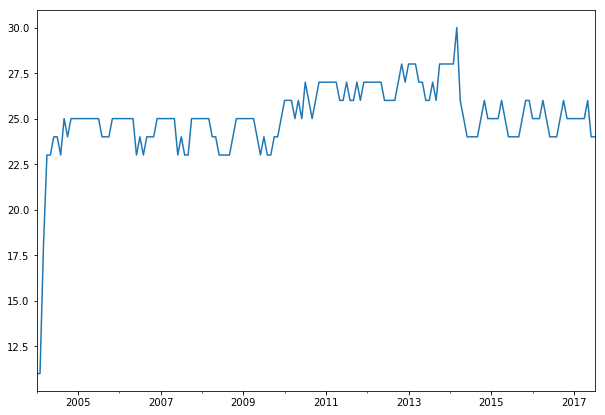

In [60]:
mt['created_date'].value_counts().sort_index().plot(figsize=(10,7))

In [12]:
mt['complaint_type'].value_counts()

Dirty Conditions                 163
Electrical                       163
Building/Use                     163
Water Conservation               163
Street Light Condition           163
Water System                     163
Sewer                            163
General Construction/Plumbing    163
Plumbing                         163
Water Quality                    162
Noise                            161
PLUMBING                         161
ELECTRIC                         161
Sanitation Condition             161
Blocked Driveway                 160
Noise - Street/Sidewalk          160
Noise - Commercial               160
Street Condition                 160
Root/Sewer/Sidewalk Condition    155
PAINT - PLASTER                  121
GENERAL CONSTRUCTION             121
NONCONST                         121
HEATING                          121
Non-Residential Heat             117
Snow                              98
Noise - Residential               91
Illegal Parking                   86
S

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 7 Text xticklabel objects>)

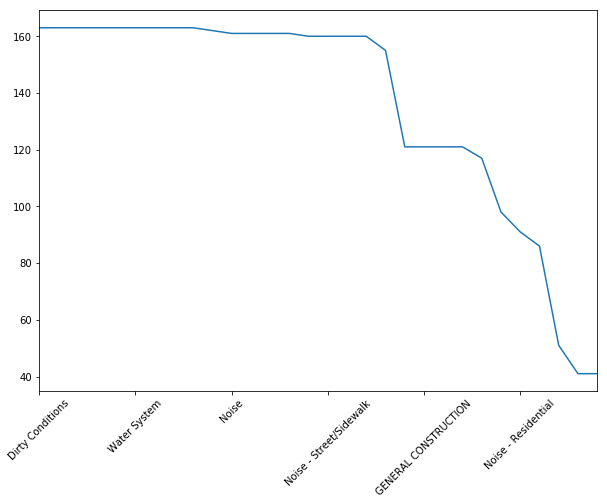

In [14]:
mt['complaint_type'].value_counts().plot(figsize=(10,7))
plt.xticks(rotation=45)

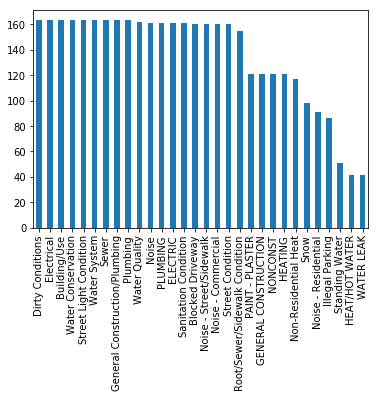

In [15]:
mt['complaint_type'].value_counts().plot.bar()

In [25]:
mt.count()[2:]

1000100.0       7
1000201.0     941
1000202.0    1422
1000500.0      15
1000600.0    2337
1000700.0    1832
1000800.0    2382
1000900.0    1693
1001001.0     548
1001002.0     610
1001200.0    1351
1001300.0    1914
1001401.0     792
1001402.0    1886
1001501.0    2016
1001502.0    2314
1001600.0    2667
1001800.0    2879
1002000.0     534
1002100.0    2237
1002201.0    2074
1002202.0    1734
1002400.0     530
1002500.0     669
1002601.0    1930
1002602.0    2267
1002700.0     943
1002800.0    2411
1002900.0    2191
1003001.0    2553
             ... 
5020700.0    2951
5020801.0    2212
5020803.0    1927
5020804.0    1725
5021300.0    2580
5022300.0    2214
5022600.0    2285
5022800.0     952
5023100.0    2264
5023900.0    2026
5024401.0    1900
5024402.0    1582
5024700.0    1865
5024800.0    2146
5025100.0    1887
5027301.0    1569
5027302.0    1598
5027702.0    1913
5027704.0    1683
5027705.0    2040
5027706.0    1550
5027900.0    1354
5029102.0    1843
5029103.0    2178
5029104.0 

(array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.]), <a list of 10 Text xticklabel objects>)

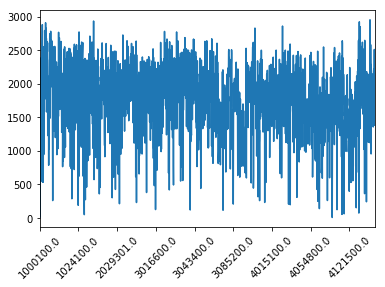

In [24]:
mt.count()[2:].plot()
plt.xticks(rotation=45)

(array([   0,    1,    2, ..., 2160, 2161, 2162]),
 <a list of 2163 Text xticklabel objects>)

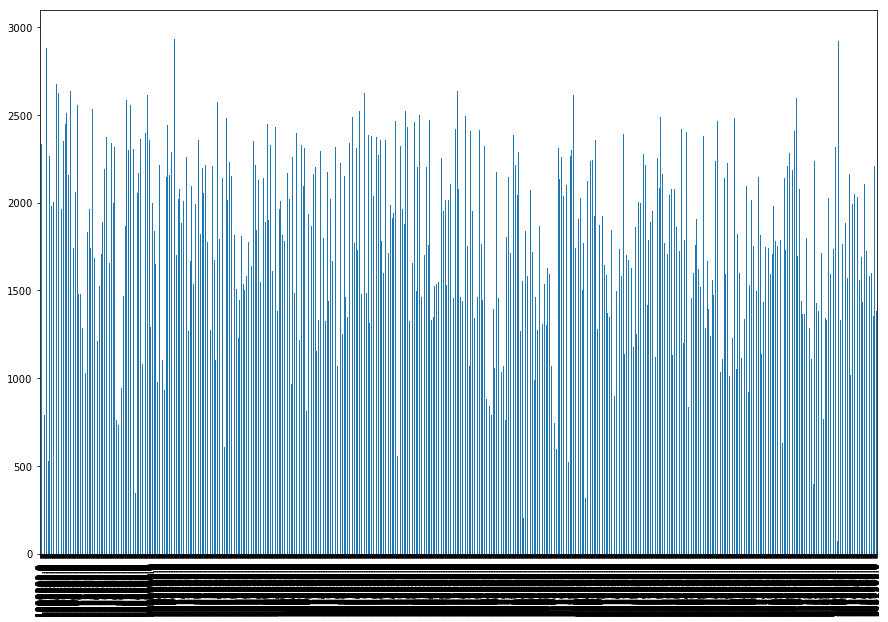

In [33]:
mt.count()[2:].plot.bar(figsize=(15,10))
plt.xticks(rotation=90)

(array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.]), <a list of 10 Text xticklabel objects>)

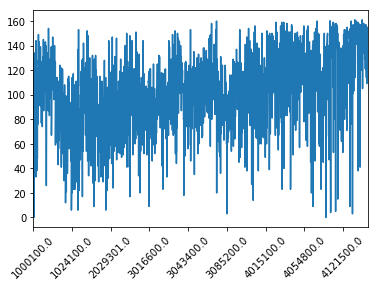

In [41]:
mt[mt['complaint_type']=='Sewer'].count()[2:].plot()
plt.xticks(rotation=45)

(array([   0,    1,    2, ..., 2160, 2161, 2162]),
 <a list of 2163 Text xticklabel objects>)

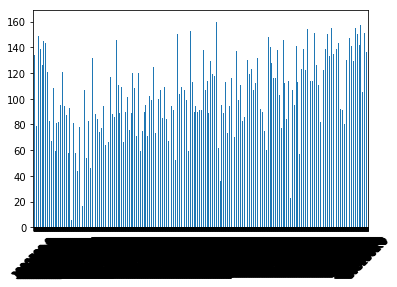

In [42]:
mt[mt['complaint_type']=='Sewer'].count()[2:].plot(kind='bar')
plt.xticks(rotation=45)

In [45]:
mt[mt['complaint_type']=='Sewer']

complaint_type created_date  1000100.0  1000201.0  1000202.0  1000500.0  \
5             Sewer   2004-01-31        NaN        NaN        NaN        NaN   
19            Sewer   2004-02-29        NaN        NaN        NaN        NaN   
26            Sewer   2004-03-31        NaN        NaN        NaN        NaN   
42            Sewer   2004-04-30        NaN        NaN        NaN        NaN   
78            Sewer   2004-05-31        NaN        NaN        NaN        NaN   
108           Sewer   2004-06-30        NaN        NaN        1.0        NaN   
124           Sewer   2004-07-31        NaN        3.0        1.0        NaN   
142           Sewer   2004-08-31        NaN        NaN        3.0        NaN   
168           Sewer   2004-09-30        NaN        NaN        NaN        NaN   
185           Sewer   2004-10-31        NaN        1.0        NaN        NaN   
221           Sewer   2004-11-30        NaN        NaN        1.0        NaN   
243           Sewer   2004-12-31        NaN        NaN        1.0        NaN   
267           Sewer   2005-01-31        NaN        NaN        1.0        NaN   
293           Sewer   2005-02-28        NaN        NaN        NaN        NaN   
317           Sewer   2005-03-31        NaN        1.0        1.0        NaN   
338           Sewer   2005-04-30        NaN        NaN        NaN        NaN   
359           Sewer   2005-05-31        NaN        NaN        NaN        NaN   
383           Sewer   2005-06-30        NaN        NaN        2.0        NaN   
423           Sewer   2005-07-31        NaN        NaN        NaN        NaN   
449           Sewer   2005-08-31        NaN        NaN        1.0        NaN   
472           Sewer   2005-09-30        NaN        NaN        NaN        NaN   
492           Sewer   2005-10-31        NaN        NaN        1.0        NaN   
524           Sewer   2005-11-30        NaN        NaN        2.0        NaN   
537           Sewer   2005-12-31        NaN        NaN        2.0        NaN   
565           Sewer   2006-01-31        NaN        NaN        2.0        NaN   
598           Sewer   2006-02-28        NaN        NaN        2.0        NaN   
626           Sewer   2006-03-31        NaN        NaN        3.0        NaN   
634           Sewer   2006-04-30        NaN        NaN        NaN        NaN   
676           Sewer   2006-05-31        NaN        NaN        6.0        NaN   
688           Sewer   2006-06-30        NaN        1.0       14.0        NaN   
...             ...          ...        ...        ...        ...        ...   
3354          Sewer   2015-02-28        NaN        NaN        1.0        NaN   
3377          Sewer   2015-03-31        NaN        1.0        NaN        NaN   
3397          Sewer   2015-04-30        NaN        NaN        2.0        NaN   
3408          Sewer   2015-05-31        NaN        1.0        NaN        NaN   
3433          Sewer   2015-06-30        NaN        3.0        3.0        NaN   
3455          Sewer   2015-07-31        NaN        NaN        NaN        NaN   
3486          Sewer   2015-08-31        NaN        NaN        2.0        NaN   
3521          Sewer   2015-09-30        NaN        NaN        NaN        NaN   
3540          Sewer   2015-10-31        NaN        NaN        1.0        NaN   
3573          Sewer   2015-11-30        NaN        NaN        NaN        NaN   
3579          Sewer   2015-12-31        NaN        NaN        NaN        NaN   
3604          Sewer   2016-01-31        NaN        NaN        1.0        NaN   
3650          Sewer   2016-02-29        NaN        NaN        NaN        NaN   
3655          Sewer   2016-03-31        NaN        NaN        1.0        NaN   
3696          Sewer   2016-04-30        NaN        NaN        1.0        NaN   
3718          Sewer   2016-05-31        NaN        NaN        NaN        NaN   
3747          Sewer   2016-06-30        NaN        NaN        NaN        NaN   
3768          Sewer   2016-07-31        NaN        NaN        NaN        NaN   
3801 

(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.]), <a list of 10 Text xticklabel objects>)

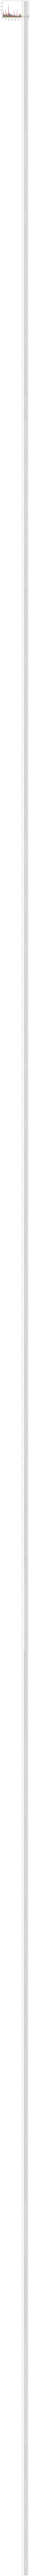

In [51]:
mt[mt['complaint_type']=='Sewer'].plot()
plt.xticks(rotation=45)

mt.plot()

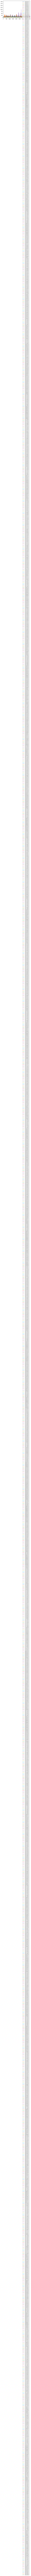

In [47]:
mt.plot()

In [57]:
table=mt.pivot_table(index=['created_date','complaint_type'])

In [59]:
table.head()

1000100.0  1000201.0  1000202.0  \
created_date complaint_type                                                   
2004-01-31   Building/Use                         NaN        NaN        NaN   
             Dirty Conditions                     NaN        NaN        NaN   
             Electrical                           NaN        NaN        NaN   
             General Construction/Plumbing        NaN        NaN        2.0   
             Plumbing                             NaN        NaN        1.0   

                                            1000500.0  1000600.0  1000700.0  \
created_date complaint_type                                                   
2004-01-31   Building/Use                         NaN        NaN        NaN   
             Dirty Conditions                     NaN        NaN        NaN   
             Electrical                           NaN        NaN        NaN   
             General Construction/Plumbing        NaN        NaN        NaN   
             Plumbing                             NaN        NaN        NaN   

                                            1000800.0  1000900.0  1001001.0  \
created_date complaint_type                                                   
2004-01-31   Building/Use                         NaN        NaN        NaN   
             Dirty Conditions                     NaN        NaN        NaN   
             Electrical                           NaN        NaN        NaN   
             General Construction/Plumbing        2.0        4.0        NaN   
             Plumbing                             NaN        NaN        NaN   

                                            1001002.0    ...      5027706.0  \
created_date complaint_type                              ...                  
2004-01-31   Building/Use                         NaN    ...            2.0   
             Dirty Conditions                     NaN    ...            NaN   
             Electrical                           NaN    ...            NaN   
             General Construction/Plumbing        NaN    ...            NaN   
             Plumbing                             NaN    ...            NaN   

                                            5027900.0  5029102.0  5029103.0  \
created_date complaint_type                                                   
2004-01-31   Building/Use                         NaN        1.0        1.0   
             Dirty Conditions                     NaN        NaN        NaN   
             Electrical                           NaN        NaN        NaN   
             General Construction/Plumbing        NaN        NaN        3.0   
             Plumbing                             NaN        NaN        NaN   

                                            5029104.0  5030301.0  5030302.0  \
created_date complaint_type                                                   
2004-01-31   Building/Use                         NaN        NaN        1.0   
             Dirty Conditions                     NaN        NaN        NaN   
             Electrical                           NaN        NaN        NaN   
             General Construction/Plumbing        NaN        NaN        1.0   
             Plumbing                             NaN        NaN        NaN   

                                            5031901.0  5031902.0  5032300.0  
created_date complaint_type                                                  
2004-01-31   Building/Use                         NaN        NaN        NaN  
             Dirty Conditions                     NaN        NaN        NaN  
             Electrical                           NaN        NaN        NaN  
             General Construction/Plumbing        NaN        NaN        2.0  
             Plumbing                             NaN        NaN        NaN  

[5 rows x 2163 columns]

In [64]:
table.sum().max()

63761.0

In [73]:
table.sum().min()

5.0

In [72]:
table.sum()[table.sum()==63761.0] 
#highest complaint over the year because washtoning height 

1024500.0    63761.0
dtype: float64

In [74]:
table.sum()[table.sum()==5.0]
#lowest is in queen park cemetery

4079300.0    5.0
dtype: float64

(array([    0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,  1750.,
         2000.,  2250.]), <a list of 10 Text xticklabel objects>)

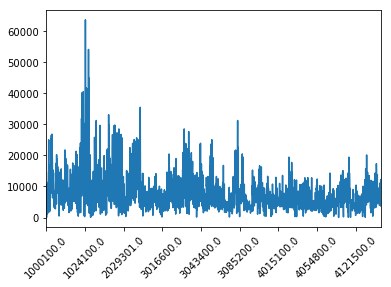

In [62]:
table.sum().plot()
plt.xticks(rotation=45)

In [86]:
table.sum(axis=1)

created_date  complaint_type               
2004-01-31    Building/Use                      1513.0
              Dirty Conditions                     5.0
              Electrical                         171.0
              General Construction/Plumbing     1998.0
              Plumbing                           177.0
              Sewer                               16.0
              Snow                                 4.0
              Street Light Condition               2.0
              Water Conservation                   9.0
              Water Quality                        1.0
              Water System                        12.0
2004-02-29    Building/Use                      1577.0
              Dirty Conditions                     1.0
              Electrical                         186.0
              General Construction/Plumbing     2415.0
              Plumbing                           165.0
              Sewer                               23.0
              Snow   